In [1]:
import MKLpy
import pandas as pd
import numpy as np
import sklearn.svm as svm
import pickle
import os
from sklearn.metrics.pairwise import rbf_kernel
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_recall_fscore_support
# from sklearn.model_selection import KFold, cross_val_score
# from sklearn.multiclass import OneVsRestClassifier  # support from multiclass
scaler = StandardScaler()
import time
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score
from collections import defaultdict
import matplotlib.pyplot as plt
from MKLpy.metrics import pairwise
from MKLpy.preprocessing import normalization, rescale_01
from MKLpy.preprocessing import kernel_normalization
from MKLpy.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics.pairwise import rbf_kernel as RBF
import pickle as pkl
###


from MKLpy.metrics import pairwise
from MKLpy.algorithms import AverageMKL, EasyMKL, KOMD#KOMD is not a MKL algorithm but a simple kernel machine like the SVM
#evaluate the solution
from sklearn.metrics import accuracy_score, roc_auc_score 
from sklearn.metrics import roc_curve, auc

from MKLpy.metrics.pairwise.misc import homogeneous_polynomial_kernel as HPK_kernel
%matplotlib inline


In [52]:

def open_pickle_file(path, pickle_file):
    file_loc = os.path.join(path, pickle_file)
    pickle_to_file = pickle.load(open(file_loc, "rb"))
    return pickle_to_file
def featureCreation4Viz(idxKey, locDict):
    ''' gives out clean features and labels for a given locDict and a idxKey '''
    keys=list(locDict.keys())
    featuresIdxDirFileLoc= locDict[keys[idxKey]][0]
    labelsIdxDirFileLoc= locDict[keys[idxKey]][1]
    ''' read the features file'''
    featuresTupleFile = pickle.load(open(featuresIdxDirFileLoc,"rb"), encoding='latin1') 
    dfFeatures = pd.concat([featuresTupleFile[0], featuresTupleFile[1],\
                                                 featuresTupleFile[2], featuresTupleFile[3]], axis=1, sort=False).fillna(0)
    ''' read the labels file'''
    labelsDf=pd.read_csv(labelsIdxDirFileLoc)
    ''' pop the labels out'''
    labels =labelsDf['label_PrMov__window_5__thres_arbitrary__0.1'] 
    '''dataframe of Features and Labels - X and Y'''
    dfXY = pd.concat([dfFeatures, labels], axis=1, sort='False').dropna()
#     labelName = str(dfXY.columns[dfXY.columns.str.contains(pat='label')].values[0])
#     ''' drop the labels from the features'''
#     dfX = dfXY.drop(columns=[ labelName])
#     arrX = np.array(dfX)
#     ''' feature normalisation'''
#     #feature scaling in [0,1] - X = rescale_01(arrX)
#     X = normalization(rescale_01(arrX))
#     y = dfXY[dfXY.columns[dfXY.columns.str.contains(pat='label')]].iloc[:, 0]
#     ''' returns features, labels'''
    return dfXY

In [18]:
hardDrivesLoc = '/media/ak/'
dataOnlyDrive = '/media/ak/DataOnly'  # external date only drive
ext_drive_loc = '/media/ak/My Passport/Experiment Data/'
data_dir = os.getenv('FINANCE_DATA')  # internal folder with finance data
#  input drive
inputDrive = hardDrivesLoc
''' Inputs '''
folderIdx = 0
folderList = [s for s in os.listdir(dataOnlyDrive) if s.startswith('Dat') or s.startswith('Fin')]
finalLocation = "/".join((dataOnlyDrive, folderList[folderIdx]))
symbols = [s for s in os.listdir(finalLocation) if s.endswith('.L')]  # keep a list of the symbols
print(symbols)
# picking up a specific symbol
symbolIdx = 5  # pick one of the symbols
# symbols[symbolIdx] -->output :PRU.L
# do a join to get the location
symbolLocation = "/".join((finalLocation, symbols[symbolIdx]))
# # get the features now
symbolFeaturesLocation = "/".join((symbolLocation, 'MODEL_BASED'))  # where all the HMM output is

# print(symbolFeaturesLocation) # <-- all the HMM model output is here, for each model there is a Date Folder and
# then OOS files
locIdx = 1  # '''WorkDrive'''

selection = os.listdir(inputDrive)[locIdx]

selectionLoc = os.path.join(inputDrive, selection)
# ''' location of WorkDrive'''
dataList = [s for s in os.listdir(selectionLoc) if s.startswith('Dat')]
DataLoc = os.path.join(hardDrivesLoc, selection, dataList[1])
path = 'MKL_Experiments'
MKLExpPath = os.path.join(DataLoc, path)
MKLSymbolPath = os.path.join(MKLExpPath, symbols[symbolIdx])

['BLT.L', 'CNA.L', 'PRU.L', 'BATS.L', 'CEY.L', 'APF.L', 'AZN.L', 'CCL.L', 'CPG.L', 'BARC.L', 'AV.L', 'AAL.L']


In [33]:
HMMModelFeaturesLabelsCommon = pkl.load(open("/".join((MKLSymbolPath, "LocDictsListCorrect.pkl")), "rb"),
                                                encoding='latin1')

In [80]:
i=12

dfXY = featureCreation4Viz(i, HMMModelFeaturesLabelsCommon)
# Xte, yte = featureCreation(i + 1, HMMModelFeaturesLabelsCommon)

In [81]:
ytr.unique()

array([0., 1.])

In [82]:
SymbolCommonPaths =open_pickle_file(MKLSymbolPath,'LocDictsListCorrect.pkl' )

In [83]:
import pandas as pd
from yellowbrick.classifier.confusion_matrix import *
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
# Feature Analysis Imports 
from yellowbrick.features import JointPlotVisualizer
from yellowbrick.features import ParallelCoordinates
from yellowbrick.features import PCADecomposition
from yellowbrick.features import Rank1D, Rank2D 
from yellowbrick.features import RadViz 

In [84]:
labelName = str(dfXY.columns[dfXY.columns.str.contains(pat='label')].values[0])
''' drop the labels from the features'''
dfX = dfXY.drop(columns=[ labelName])
arrX = np.array(dfX)
''' feature normalisation'''
#feature scaling in [0,1] - X = rescale_01(arrX)
X = normalization(rescale_01(arrX))
y = dfXY[dfXY.columns[dfXY.columns.str.contains(pat='label')]].iloc[:, 0]
''' returns features, labels'''
features =list(dfX.columns.values)

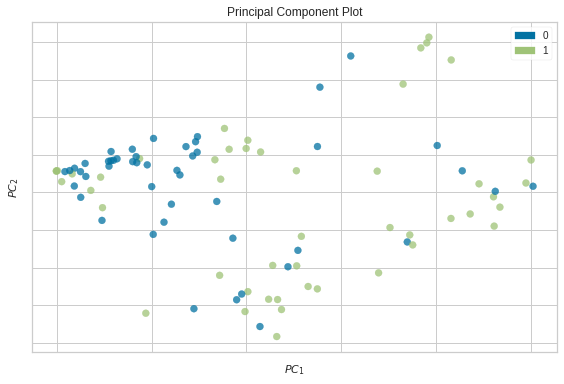

In [85]:
# Encode the categorical data with one-hot encoding
X = pd.get_dummies(dfXY[features])

# Convert unique classes (strings) into integers
encoder = LabelEncoder()
y = encoder.fit_transform(dfXY[labelName])
visualizer = PCADecomposition(scale=True, center=False, col=y)
visualizer.fit_transform(X,y)
visualizer.show()

In [86]:
# Instantiate the visualizer with the Covariance ranking algorithm 
visualizer = Rank1D(features=features, algorithm='shapiro')


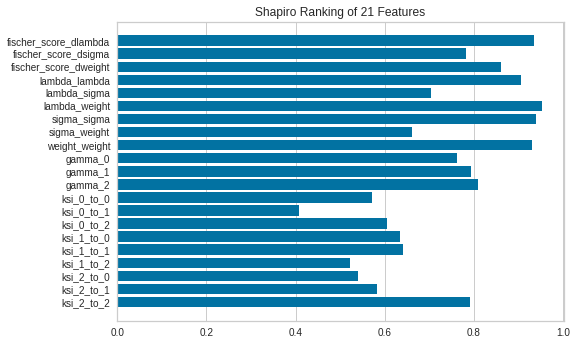

In [87]:
visualizer.fit(X, y)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.show()                   # Finalize and render the figure

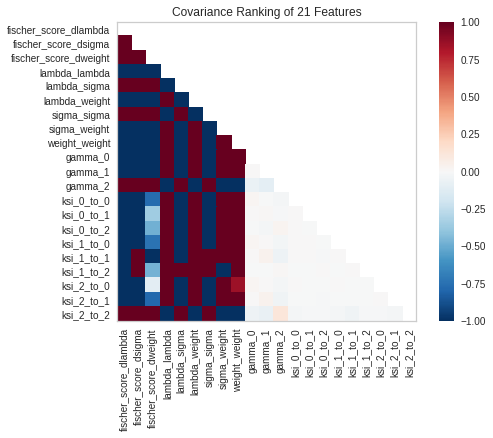

In [88]:
# Instantiate the visualizer with the Covariance ranking algorithm 
visualizer = Rank2D(features=features, algorithm='covariance')

visualizer.fit(X, y)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.show()                   # Finalize and render the visualizer

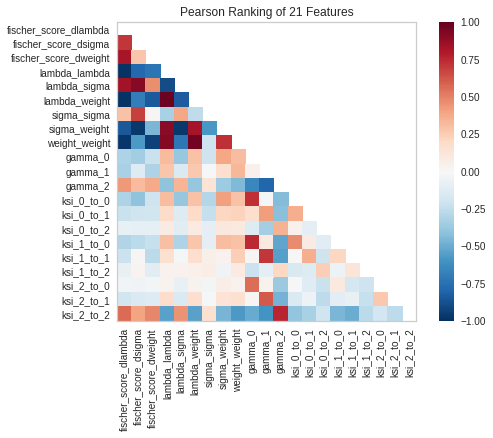

In [89]:
# Instantiate the visualizer with the Pearson ranking algorithm 
visualizer = Rank2D(features=features, algorithm='pearson')

visualizer.fit(X, y)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.show()                   # Finalize and render the visualizer

### RadViz 

RadViz is a multivariate data visualization algorithm that plots each feature dimension uniformly around the circumference of a circle then plots points on the interior of the circle such that the point normalizes its values on the axes from the center to each arc. This mechanism allows as many dimensions as will easily fit on a circle, greatly expanding the dimensionality of the visualization. 

Data scientists use this method to detect separability between classes. E.g. is there an opportunity to learn from the feature set or is there just too much noise?

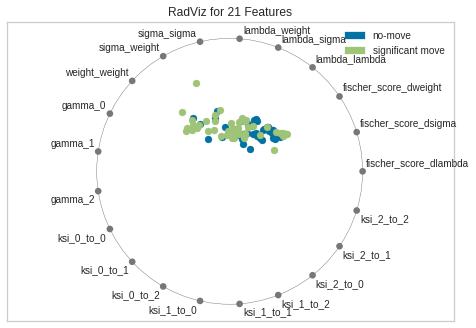

In [90]:
# Instantiate the visualizer
visualizer = visualizer = RadViz(classes=classes, features=features)

visualizer.fit(X, y)      # Fit the data to the visualizer
visualizer.transform(X)   # Transform the data
visualizer.show()         # Finalize and render the visualizer

In [92]:
# yellowbrick.features.importances
# Feature importance visualizer
#
# Author:  Benjamin Bengfort <benjamin@bengfort.com>
# Created: Fri Mar 02 15:21:36 2018 -0500
# Author:  Rebecca Bilbro <rbilbro@districtdatalabs.com>
# Updated: Sun Jun 24 10:53:36 2018 -0500
#
# Copyright (C) 2018 District Data Labs
# For license information, see LICENSE.txt
#
# ID: importances.py [] benjamin@bengfort.com $

"""
Implementation of a feature importances visualizer. This visualizer sits in
kind of a weird place since it is technically a model scoring visualizer, but
is generally used for feature engineering.
"""

##########################################################################
## Imports
##########################################################################

import numpy as np
import matplotlib.pyplot as plt

from yellowbrick.utils import is_dataframe
from yellowbrick.base import ModelVisualizer
from yellowbrick.exceptions import YellowbrickTypeError, NotFitted


##########################################################################
## Feature Visualizer
##########################################################################

class FeatureImportances(ModelVisualizer):
    """
    Displays the most informative features in a model by showing a bar chart
    of features ranked by their importances. Although primarily a feature
    engineering mechanism, this visualizer requires a model that has either a
    ``coef_`` or ``feature_importances_`` parameter after fit.

    Parameters
    ----------
    model : Estimator
        A Scikit-Learn estimator that learns feature importances. Must support
        either ``coef_`` or ``feature_importances_`` parameters.

    ax : matplotlib Axes, default: None
        The axis to plot the figure on. If None is passed in the current axes
        will be used (or generated if required).

    labels : list, default: None
        A list of feature names to use. If a DataFrame is passed to fit and
        features is None, feature names are selected as the column names.

    relative : bool, default: True
        If true, the features are described by their relative importance as a
        percentage of the strongest feature component; otherwise the raw
        numeric description of the feature importance is shown.

    absolute : bool, default: False
        Make all coeficients absolute to more easily compare negative
        coeficients with positive ones.

    xlabel : str, default: None
        The label for the X-axis. If None is automatically determined by the
        underlying model and options provided.

    kwargs : dict
        Keyword arguments that are passed to the base class and may influence
        the visualization as defined in other Visualizers.

    Attributes
    ----------
    features_ : np.array
        The feature labels ranked according to their importance

    feature_importances_ : np.array
        The numeric value of the feature importance computed by the model

    Examples
    --------

    >>> from sklearn.ensemble import GradientBoostingClassifier
    >>> visualizer = FeatureImportances(GradientBoostingClassifier())
    >>> visualizer.fit(X, y)
    >>> visualizer.show()
    """

    def __init__(self, model, ax=None, labels=None, relative=True,
                 absolute=False, xlabel=None, **kwargs):
        super(FeatureImportances, self).__init__(model, ax, **kwargs)

        # Data Parameters
        self.set_params(
            labels=labels, relative=relative, absolute=absolute,
            xlabel=xlabel,
        )

    def fit(self, X, y=None, **kwargs):
        """
        Fits the estimator to discover the feature importances described by
        the data, then draws those importances as a bar plot.

        Parameters
        ----------
        X : ndarray or DataFrame of shape n x m
            A matrix of n instances with m features

        y : ndarray or Series of length n
            An array or series of target or class values

        kwargs : dict
            Keyword arguments passed to the fit method of the estimator.

        Returns
        -------
        self : visualizer
            The fit method must always return self to support pipelines.
        """
        super(FeatureImportances, self).fit(X, y, **kwargs)

        # Get the feature importances from the model
        self.feature_importances_ = self._find_importances_param()
        
        # Check if feature importances is a multidimensional array & if so flatten
        if self.feature_importances_.ndim > 1:
            self.feature_importances_ = np.mean(self.feature_importances_, axis=0)

        # Apply absolute value filter before normalization
        if self.absolute:
            self.feature_importances_ = np.abs(self.feature_importances_)

        # Normalize features relative to the maximum
        if self.relative:
            maxv = self.feature_importances_.max()
            self.feature_importances_ /= maxv
            self.feature_importances_ *= 100.0

        # Create labels for the feature importances
        # NOTE: this code is duplicated from MultiFeatureVisualizer
        if self.labels is None:
            # Use column names if a dataframe
            if is_dataframe(X):
                self.features_ = np.array(X.columns)

            # Otherwise use the column index as the labels
            else:
                _, ncols = X.shape
                self.features_ = np.arange(0, ncols)
        else:
            self.features_ = np.array(self.labels)

        # Sort the features and their importances
        sort_idx = np.argsort(self.feature_importances_)
        self.features_ = self.features_[sort_idx]
        self.feature_importances_ = self.feature_importances_[sort_idx]

        # Draw the feature importances
        self.draw()
        return self

    def draw(self, **kwargs):
        """
        Draws the feature importances as a bar chart; called from fit.
        """
        # Quick validation
        for param in ('feature_importances_', 'features_'):
            if not hasattr(self, param):
                raise NotFitted("missing required param '{}'".format(param))

        # Find the positions for each bar
        pos = np.arange(self.features_.shape[0]) + 0.5

        # Plot the bar chart
        self.ax.barh(pos, self.feature_importances_, align='center')

        # Set the labels for the bars
        self.ax.set_yticks(pos)
        self.ax.set_yticklabels(self.features_)

        return self.ax

    def finalize(self, **kwargs):
        """
        Finalize the drawing setting labels and title.
        """
        # Set the title
        self.set_title('Feature Importances of {} Features using {}'.format(
                len(self.features_), self.name))

        # Set the xlabel
        self.ax.set_xlabel(self._get_xlabel())

        # Remove the ygrid
        self.ax.grid(False, axis='y')

        # Ensure we have a tight fit
        plt.tight_layout()

    def _find_importances_param(self):
        """
        Searches the wrapped model for the feature importances parameter.
        """
        for attr in ("feature_importances_", "coef_"):
            try:
                return getattr(self.estimator, attr)
            except AttributeError:
                continue

        raise YellowbrickTypeError(
            "could not find feature importances param on {}".format(
                self.estimator.__class__.__name__
            )
        )

    def _get_xlabel(self):
        """
        Determines the xlabel based on the underlying data structure
        """
        # Return user-specified label
        if self.xlabel:
            return self.xlabel

        # Label for coefficients
        if hasattr(self.estimator, "coef_"):
            if self.relative:
                return "relative coefficient magnitude"
            return "coefficient value"

        # Default label for feature_importances_
        if self.relative:
            return "relative importance"
        return "feature importance"

    def _is_fitted(self):
        """
        Returns true if the visualizer has been fit.
        """
        return hasattr(self, 'feature_importances_') and hasattr(self, 'features_')


##########################################################################
## Quick Method
##########################################################################

def feature_importances(model, X, y=None, ax=None, labels=None,
                        relative=True, absolute=False, xlabel=None, **kwargs):
    """
    Displays the most informative features in a model by showing a bar chart
    of features ranked by their importances. Although primarily a feature
    engineering mechanism, this visualizer requires a model that has either a
    ``coef_`` or ``feature_importances_`` parameter after fit.

    Parameters
    ----------
    model : Estimator
        A Scikit-Learn estimator that learns feature importances. Must support
        either ``coef_`` or ``feature_importances_`` parameters.

    X : ndarray or DataFrame of shape n x m
        A matrix of n instances with m features

    y : ndarray or Series of length n, optional
        An array or series of target or class values

    ax : matplotlib Axes, default: None
        The axis to plot the figure on. If None is passed in the current axes
        will be used (or generated if required).

    labels : list, default: None
        A list of feature names to use. If a DataFrame is passed to fit and
        features is None, feature names are selected as the column names.

    relative : bool, default: True
        If true, the features are described by their relative importance as a
        percentage of the strongest feature component; otherwise the raw
        numeric description of the feature importance is shown.

    absolute : bool, default: False
        Make all coeficients absolute to more easily compare negative
        coeficients with positive ones.

    xlabel : str, default: None
        The label for the X-axis. If None is automatically determined by the
        underlying model and options provided.

    kwargs : dict
        Keyword arguments that are passed to the base class and may influence
        the visualization as defined in other Visualizers.

    Returns
    -------
    ax : matplotlib axes
        Returns the axes that the parallel coordinates were drawn on.
    """
    # Instantiate the visualizer
    visualizer = FeatureImportances(
        model, ax, labels, relative, absolute, xlabel, **kwargs)

    # Fit and transform the visualizer (calls draw)
    visualizer.fit(X, y)
    visualizer.finalize()

    # Return the axes object on the visualizer
    return visualizer.ax


## Feature Importance

/home/ak/Envs/resrPyth3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


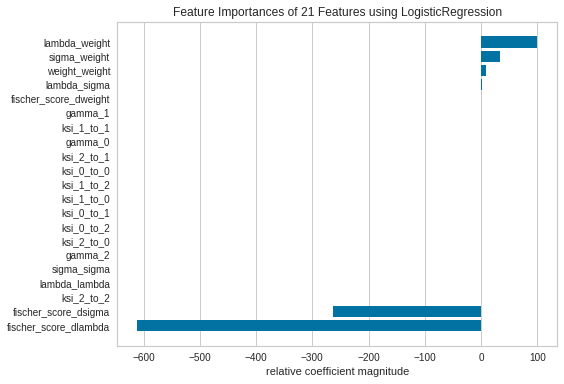

In [93]:
lr_importances = FeatureImportances(LogisticRegression())
lr_importances.fit(X,y)
lr_importances.show()

/home/ak/Envs/resrPyth3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


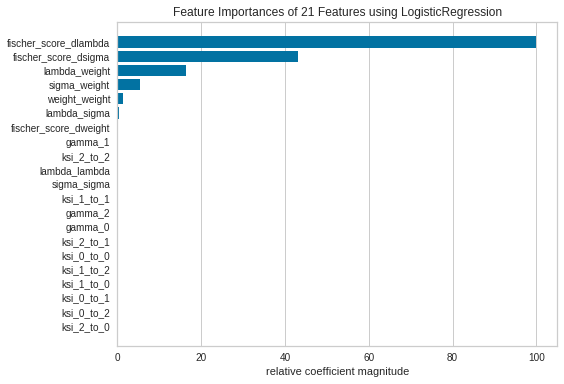

In [94]:
lr_importances = FeatureImportances(LogisticRegression(), absolute=True)
lr_importances.fit(X,y)
lr_importances.show()